In [ ]:
!pip3 install nltk
import nltk 
nltk.download('stopwords', download_dir='E:/div_code/django_env/nltk_data')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to
[nltk_data]     E:/div_code/django_env/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

In [46]:
train_data=pd.read_csv("Train_Data.csv")

In [47]:

train_data.head()

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0


In [48]:
train_data.shape

(44262, 2)

In [49]:
train_data.dtypes

headline        object
is_sarcastic     int64
dtype: object

checking the null values

In [50]:
train_data.isnull().any()

headline        False
is_sarcastic    False
dtype: bool

countplot of target variable

<Axes: ylabel='count'>

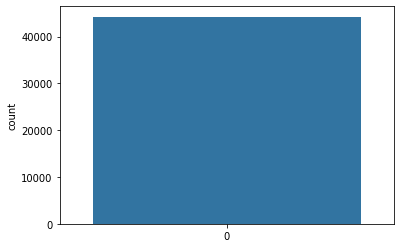

In [51]:
sns.countplot(train_data.is_sarcastic)

In [52]:
train_data['headlines_length']=train_data['headline'].str.len()
train_data["headlines_length"]

0        53
1        66
2        65
3        45
4        41
         ..
44257    48
44258    54
44259    80
44260    43
44261    57
Name: headlines_length, Length: 44262, dtype: int64

<ipython-input-53-b28637494a4e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["headlines_length"]).set_title("headlines distirbution")


Text(0.5, 1.0, 'headlines distirbution')

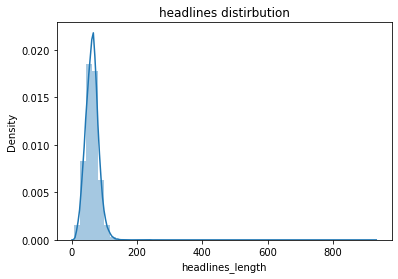

In [53]:
sns.distplot(train_data["headlines_length"]).set_title("headlines distirbution")

## wordcloud


In [54]:
def create_wordcloud(words):
    wordcloud=WordCloud(width = 800, height = 800,
                random_state=21,
                max_font_size = 110).generate(words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()


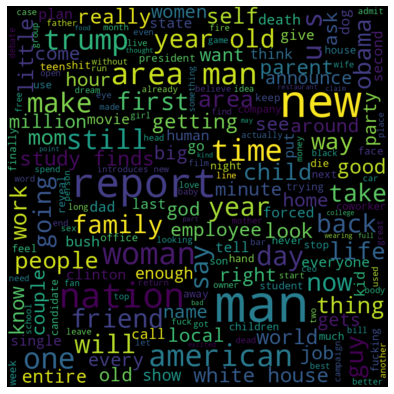

In [55]:
subset=train_data[train_data.is_sarcastic==1]
text=subset.headline.values
words=' '.join(text)
create_wordcloud(words)

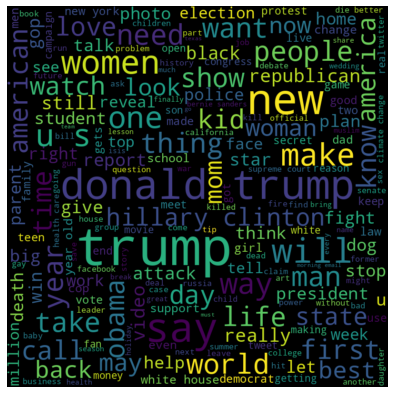

In [56]:
subset=train_data[train_data.is_sarcastic==0]
text=subset.headline.values
words=' '.join(text)
create_wordcloud(words)

cleaning data

In [61]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [62]:
def process_text(text):
    text=text.lower().replace('\n',' ').replace('\r',' ').strip()
    text=re.sub(' +',' ', text)
    text=re.sub(r'[^\w\s]',' ', text)

    stop_words=set(stopwords.words('english'))
    word_tokens=word_tokenize(text)
    filtered_sentence=[w for w in word_tokens if not w in stop_words]
    text=' '.join(filtered_sentence)
    return text

In [63]:
train_data['headline_parsed']=train_data['headline'].apply(process_text)

In [ ]:
train_data.head()

,headline,is_sarcastic,headlines_length,headline_parsed
0,supreme court votes 7-2 to legalize all worldl...,1,53,supreme court votes 7 2 legalize worldly vices
1,hungover man horrified to learn he made dozens...,1,66,hungover man horrified learn made dozens plans...
2,emily's list founder: women are the 'problem s...,0,65,emily list founder women problem solvers congress
3,send your kids back to school with confidence,0,45,send kids back school confidence
4,watch: experts talk pesticides and health,0,41,watch experts talk pesticides health


In [67]:
X_train,X_val,y_train,y_val=train_test_split(train_data['headline_parsed'],
                                             train_data['is_sarcastic'],
                                             train_size=0.8,
                                             random_state=2)

In [68]:

X_train=train_data['headline_parsed']

In [69]:
X_train.head()

0       supreme court votes 7 2 legalize worldly vices
1    hungover man horrified learn made dozens plans...
2    emily list founder women problem solvers congress
3                     send kids back school confidence
4                 watch experts talk pesticides health
Name: headline_parsed, dtype: object

In [70]:
y_train=train_data['is_sarcastic']

In [71]:
y_train.head()

0    1
1    1
2    0
3    0
4    0
Name: is_sarcastic, dtype: int64

In [72]:
X_train.shape

(44262,)

In [73]:
y_train.shape

(44262,)

In [74]:
X_val.shape

(8853,)

In [75]:
y_val.shape

(8853,)

In [76]:
ngram_range=(1,2)
min_df=10
max_df=1.
max_features=300

In [78]:
tfidf=TfidfVectorizer(encoding='utf-8',
                      ngram_range=ngram_range,
                      stop_words=None,
                      lowercase=False,
                      min_df=min_df,
                      max_df=max_df,
                      max_features=max_features,
                      norm='l2',
                      sublinear_tf=True)
features_train=tfidf.fit_transform(X_train).toarray()
labels_train=y_train

features_val=tfidf.transform(X_val).toarray()
labels_val=y_val



In [87]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))

In [79]:
labels_train.shape

(44262,)

In [80]:
labels_val.shape

(8853,)

In [81]:
features_train.shape

(44262, 300)

In [82]:
features_val.shape

(8853, 300)

## building model


# Yeni Bölüm

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

In [84]:
model=RandomForestClassifier()

In [85]:
model.fit(features_train,labels_train)
model_predictions=model.predict(features_val)
print('Accuracy', accuracy_score(labels_val,model_predictions))
print('classification report', classification_report(labels_val,model_predictions))

Accuracy 0.8280808765390263
classification report               precision    recall  f1-score   support

           0       0.80      0.91      0.85      4779
           1       0.88      0.73      0.80      4074

    accuracy                           0.83      8853
   macro avg       0.84      0.82      0.82      8853
weighted avg       0.83      0.83      0.83      8853



In [88]:

pickle.dump(model, open('model.pkl','wb'))